![Status: In Progress](https://img.shields.io/badge/status-in%20progress-yellow)
![Python](https://img.shields.io/badge/python-3.10-blue)
![Coverage](https://img.shields.io/badge/coverage-20%25-red)
![License](https://img.shields.io/badge/license-MIT-green)

<a id="table-of-contents"></a>
# 📖 Table of Contents

[🌀 Simpson's Paradox](#simpsons-paradox)    
- [🛠️ Create Data (Simpson)](#create-data-simpson)  
- [📊 Group Estimates](#group-estimates)  
- [📈 Combined Estimates](#combined-estimates)  

[🧮 Will Rogers Phenomenon](#will-rogers-phenomenon)    
- [🛠️ Create Data (Will Rogers)](#create-data-will-rogers)  
- [📉 Scatter Plot (Before Reclassification)](#scatter-before)  
- [🔁 Simulate Reclassification](#simulate-reclassification)  
- [📈 Scatter Plot (After Reclassification)](#scatter-after)  

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="simpsons-paradox"></a>

<h1>🌀 Simpson's Paradox</h1>



<details><summary><strong>📖 Click to Expand</strong></summary>

<p>Simpson's Paradox occurs when a trend observed in individual groups disappears or reverses when the groups are combined. This often happens due to differences in group sizes or confounding variables.</p>

<h5>📘 Example</h5>
<p>Imagine you're testing two versions of a website:</p>
<ul>
  <li><strong>Website 1</strong> (current design)</li>
  <li><strong>Website 2</strong> (new design)</li>
</ul>
<p>You measure the <strong>conversion rates</strong> (percentage of users who make a purchase) for each website on two platforms:</p>
<ul>
  <li><strong>Mobile</strong> users</li>
  <li><strong>Desktop</strong> users</li>
</ul>

<h5>🔍 Observations</h5>
<ol>
  <li>On <strong>Mobile</strong>, both websites perform equally well.</li>
  <li>On <strong>Desktop</strong>, Website 1 performs better.</li>
  <li>However, when combining data across both platforms, Website 2 appears to perform better.</li>
</ol>
<p>This contradiction demonstrates Simpson's Paradox and highlights the importance of analyzing group-level data.</p>

<h5>🎯 Goals</h5>
<ol>
  <li>Analyze conversion rates for Website 1 and Website 2 by platform</li>
  <li>Compute overall conversion rates</li>
  <li>Visualize and explain Simpson's Paradox</li>
</ol>

</details>


<a id="create-data-simpson"></a>
### 🛠️ Create Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Display Settings
from IPython.core.interactiveshell import InteractiveShell

# Data for each platform and channel
data = {
    "Platform": ["Twitter", "Twitter", "Instagram", "Instagram"],
    "Channel": ["Mobile", "Web", "Mobile", "Web"],
    "Visitors": [10000, 2000, 2000, 10000],
    "Conversions": [1000, 150, 300, 1200]
}

# Create DataFrame
df = pd.DataFrame(data)
df



,Platform,Channel,Visitors,Conversions
0,Twitter,Mobile,10000,1000
1,Twitter,Web,2000,150
2,Instagram,Mobile,2000,300
3,Instagram,Web,10000,1200


<a id="group-estimates"></a>
### 📊 Group Estimates

In [2]:
# Calculate conversion rate for each platform and channel
df["Conversion Rate"] = df["Conversions"] / df["Visitors"] * 100

# Combine data by channel
combined = df.groupby("Channel").sum()
combined["Conversion Rate"] = combined["Conversions"] / combined["Visitors"] * 100

# Extract platform names and conversion rates for plotting
platforms = df['Platform'].unique()  # Extract unique platforms
mobile_rates = df[df['Channel'] == 'Mobile']['Conversion Rate']
web_rates = df[df['Channel'] == 'Web']['Conversion Rate']

# Extract combined mobile and web rates
combined_mobile = combined['Conversion Rate'][0]
combined_web = combined['Conversion Rate'][1]

/var/folders/dg/01ppfw3n6_jbnx4xdx0vdmj40000gn/T/ipykernel_5936/1492700801.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined = df.groupby("Channel").sum()


In [3]:
combined

,Visitors,Conversions,Conversion Rate
Channel,,,
Mobile,12000,1300,10.833333
Web,12000,1350,11.250000


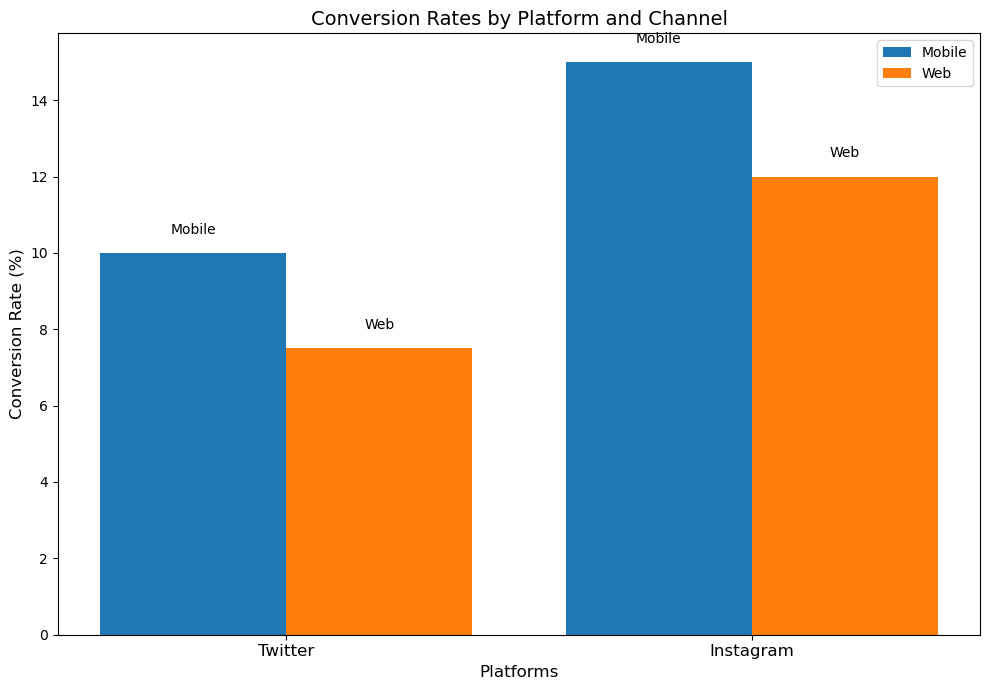

In [4]:
import matplotlib.pyplot as plt

# Define color palette
mobile_color = '#1f77b4'
web_color = '#ff7f0e'

# X-axis positions
x = range(2)

# Create the plot
plt.figure(figsize=(10, 7))

# Plot bars for Twitter
plt.bar(x[0], mobile_rates.iloc[0], width=0.4, label="Mobile", color=mobile_color)
plt.bar(x[0] + 0.4, web_rates.iloc[0], width=0.4, label="Web", color=web_color)

# Plot bars for Instagram
plt.bar(x[1], mobile_rates.iloc[1], width=0.4, color=mobile_color)
plt.bar(x[1] + 0.4, web_rates.iloc[1], width=0.4, color=web_color)

# Text labels
plt.text(x[0], mobile_rates.iloc[0] + 0.5, 'Mobile', ha='center')
plt.text(x[0] + 0.4, web_rates.iloc[0] + 0.5, 'Web', ha='center')
plt.text(x[1], mobile_rates.iloc[1] + 0.5, 'Mobile', ha='center')
plt.text(x[1] + 0.4, web_rates.iloc[1] + 0.5, 'Web', ha='center')

# Axis labels and title
plt.xlabel("Platforms", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("Conversion Rates by Platform and Channel", fontsize=14)

# Set x-ticks
plt.xticks([x[0] + 0.2, x[1] + 0.2], ['Twitter', 'Instagram'], fontsize=12)

# Legend and layout
plt.legend()
plt.tight_layout()
plt.show()


<a id="combined-estimates"></a>
### 📈 Combined Estimates

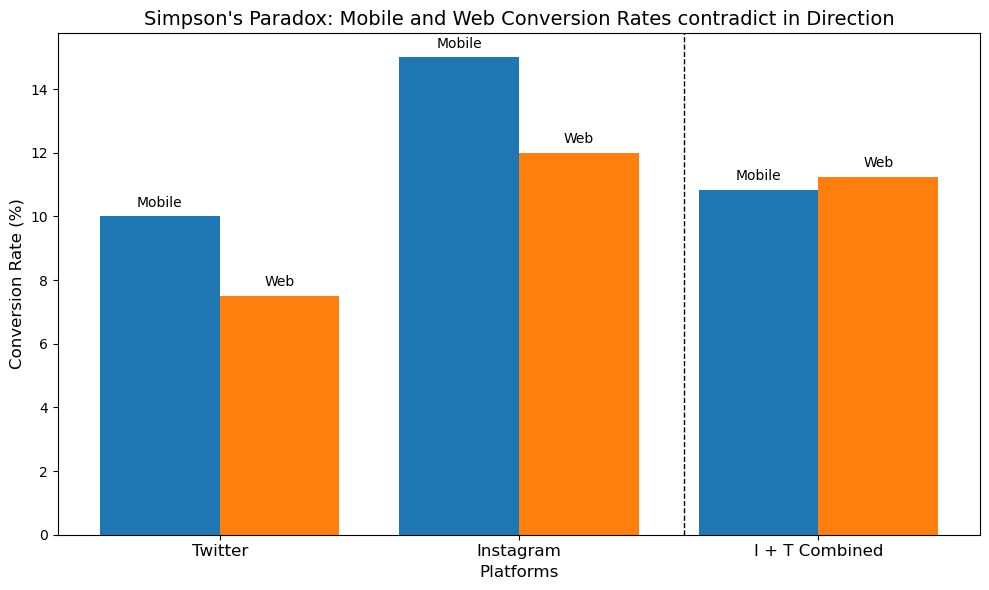

In [5]:
# Define a new color palette to match the attached plot
mobile_color = '#1f77b4'  # Blue for mobile
web_color = '#ff7f0e'     # Orange for web

# Create the plot with the correct data
plt.figure(figsize=(10, 6))

# x positions for Twitter, Instagram, and Combined
x = range(3)

# Bar plot for mobile and web rates for Twitter and Instagram
bars1 = plt.bar(x[0], mobile_rates.iloc[0], width=0.4, label="Mobile", align='center', color=mobile_color)
bars2 = plt.bar(x[0] + 0.4, web_rates.iloc[0], width=0.4, label="Web", align='center', color=web_color)

bars3 = plt.bar(x[1], mobile_rates.iloc[1], width=0.4, label="Mobile", align='center', color=mobile_color)
bars4 = plt.bar(x[1] + 0.4, web_rates.iloc[1], width=0.4, label="Web", align='center', color=web_color)

# Add the combined bars (Mobile vs Web for Combined)
plt.bar([2], [combined_mobile], width=0.4, label="Mobile", align='center', color=mobile_color)
plt.bar([2 + 0.4], [combined_web], width=0.4, label="Web", align='center', color=web_color)

# Customize plot labels and title
plt.xlabel("Platforms", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("Simpson's Paradox: Mobile and Web Conversion Rates contradict in Direction", fontsize=14)

# Set x-ticks and labels
plt.xticks([x[0] + 0.2, x[1] + 0.2, x[2] + 0.2], ['Twitter', 'Instagram', 'I + T Combined'], fontsize=12)

# Add text labels for categories (Mobile, Web, Combined)
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Mobile', ha='center', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Web', ha='center', fontsize=10)

for bar in bars3:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Mobile', ha='center', fontsize=10)
for bar in bars4:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Web', ha='center', fontsize=10)

# Add text labels for the combined bars
plt.text(2, combined_mobile + 0.3, 'Mobile', ha='center', fontsize=10)
plt.text(2 + 0.4, combined_web + 0.3, 'Web', ha='center', fontsize=10)

# Add vertical line before "Combined" category
plt.axvline(x=1.75, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()


___
[Back to the top](#table-of-contents)

<a id="will-rogers-phenomenon"></a>

<h1>🧮 Will Rogers Phenomenon</h1>


<details><summary><strong>📖 Click to Expand</strong></summary>

<p>The <strong>Will Rogers phenomenon</strong> is a statistical paradox that occurs when reclassifying or redistributing individuals between groups results in an improvement in the average (or mean) of both groups, even though no individual’s score has changed.</p>

<p>In simpler terms, it shows that moving the "worst-performing" individual from a higher-performing group to a lower-performing group can cause both groups' averages to increase, even though the individual who moved hasn’t improved at all.</p>

<h5>📘 Example</h5>
<p>Consider two classes, <strong>Class A</strong> and <strong>Class B</strong>, with the following scores:</p>
<ul>
  <li><strong>Class A</strong>: 90, 85, 80</li>
  <li><strong>Class B</strong>: 30, 35, 40</li>
</ul>

<p>Before reclassification, <strong>Class A</strong> has a higher average score than <strong>Class B</strong>. However, when we move the student with the <strong>lowest score</strong> from <strong>Class A</strong> (in this case, the student with a score of 80) to <strong>Class B</strong>, something interesting happens:</p>

<ul>
  <li>The average of <strong>Class A</strong> increases because the lowest-performing student (80) is removed.</li>
  <li>The average of <strong>Class B</strong> increases because the student with the relatively better score (80) is added to the group.</li>
</ul>

<p>Thus, <strong>both</strong> groups see an improvement in their averages, despite the fact that no individual student's score has changed.</p>

<h5>🎯 Key Takeaway</h5>
<p>This phenomenon illustrates how group averages can be misleading and highlights the importance of understanding the impact of data redistribution, especially when making decisions based on average scores.</p>

</details>


<a id="create-data-will-rogers"></a>
### 🛠️ Create Data 

In [6]:
import pandas as pd

# Simulated student data for two classes
data = {
    "Class": ["A", "A", "A", "B", "B", "B"],
    "Student": ["S1", "S2", "S3", "S4", "S5", "S6"],
    "Score": [90, 85, 80, 30, 35, 40]  # High scores in Class A, low scores in Class B
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Class,Student,Score
0,A,S1,90
1,A,S2,85
2,A,S3,80
3,B,S4,30
4,B,S5,35
5,B,S6,40


<a id="scatter-before"></a>
### 📉 Scatter Plot (Original)

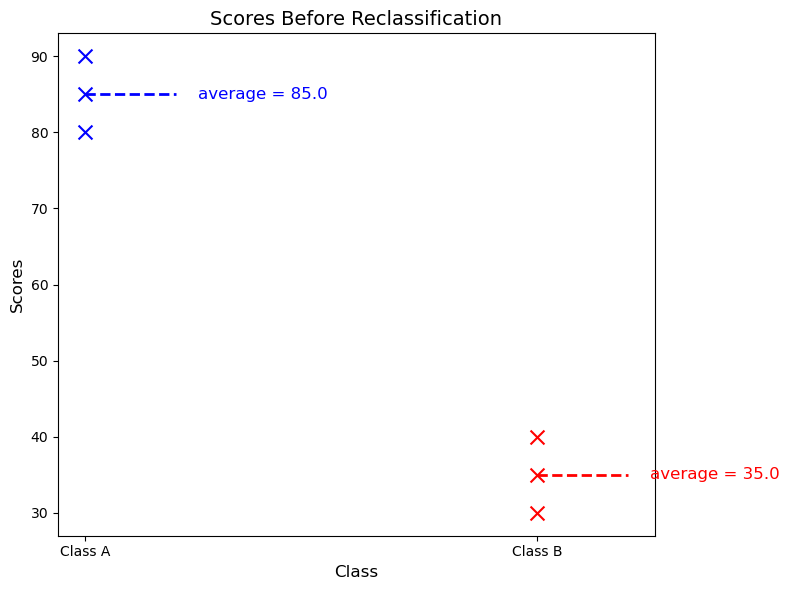

In [7]:
import matplotlib.pyplot as plt

# Scatter plot before reclassification with local average markers and annotations
plt.figure(figsize=(8, 6))

# Plot the scores for Class A and Class B before reclassification
plt.scatter(df[df['Class'] == 'A']['Class'], df[df['Class'] == 'A']['Score'], color='blue', marker='x', s=100)
plt.scatter(df[df['Class'] == 'B']['Class'], df[df['Class'] == 'B']['Score'], color='red', marker='x', s=100)

# Calculate and print the average scores before reclassification
avg_before = df.groupby("Class")["Score"].mean()

# Add small local horizontal lines denoting the group averages
plt.plot([0, 0.2], [avg_before['A'], avg_before['A']], color='blue', linestyle='--', linewidth=2)
plt.plot([1, 1.2], [avg_before['B'], avg_before['B']], color='red', linestyle='--', linewidth=2)

# Annotate the average next to the small line with the new format
plt.text(0.25, avg_before['A'], f'average = {avg_before["A"]}', color='blue', fontsize=12, verticalalignment='center')
plt.text(1.25, avg_before['B'], f'average = {avg_before["B"]}', color='red', fontsize=12, verticalalignment='center')

# Customize plot labels and title
plt.title('Scores Before Reclassification', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([0, 1], ['Class A', 'Class B'])  # Set x-ticks to class labels

# Show the plot
plt.tight_layout()
plt.show()

<a id="simulate-reclassification"></a>
### 🔁 Simulate Reclassification

##### Move the lowest student (S3 with score 80) from Class A to Class B

In [8]:
df_reclassified = df.copy()
df_reclassified.loc[df_reclassified["Student"] == "S3", "Class"] = "B"
print("\nReclassified Data:")
df_reclassified


Reclassified Data:


,Class,Student,Score
0,A,S1,90
1,A,S2,85
2,B,S3,80
3,B,S4,30
4,B,S5,35
5,B,S6,40


<a id="scatter-after"></a>
### 📈 Scatter Plot (After Reclassification)

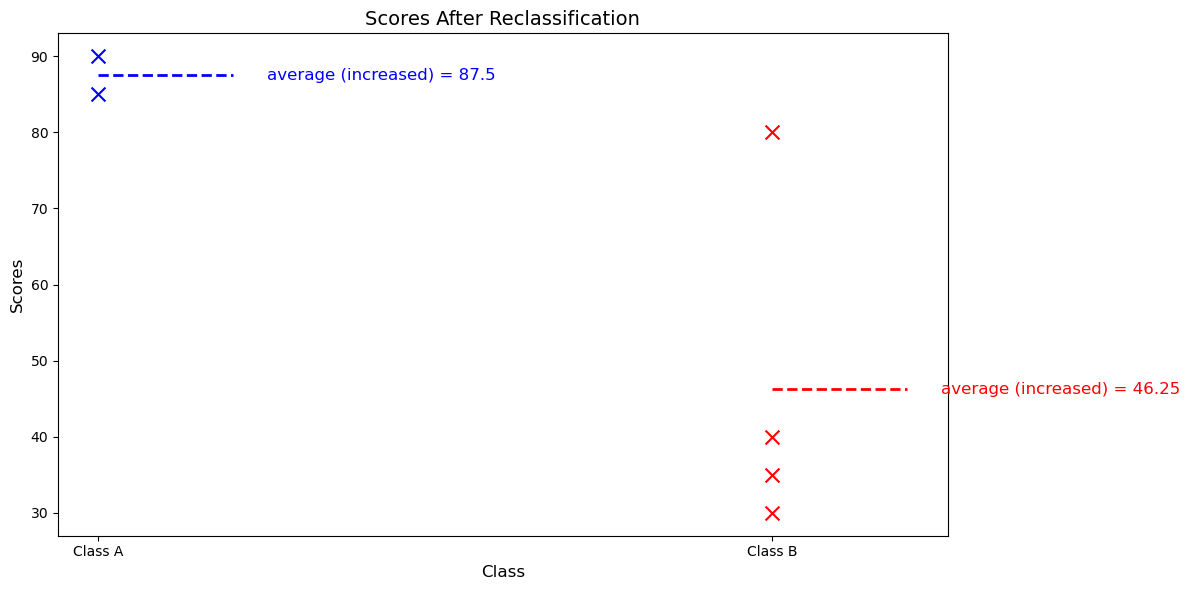

In [9]:
# Scatter plot after reclassification with local average markers and annotations
plt.figure(figsize=(12, 6))

# Plot the scores for Class A and Class B after reclassification
plt.scatter(df_reclassified[df_reclassified['Class'] == 'A']['Class'], 
            df_reclassified[df_reclassified['Class'] == 'A']['Score'], color='blue', marker='x', s=100)
plt.scatter(df_reclassified[df_reclassified['Class'] == 'B']['Class'], 
            df_reclassified[df_reclassified['Class'] == 'B']['Score'], color='red', marker='x', s=100)

# Calculate and print the average scores after reclassification
avg_after = df_reclassified.groupby("Class")["Score"].mean()

# Add small local horizontal lines denoting the group averages
plt.plot([0, 0.2], [avg_after['A'], avg_after['A']], color='blue', linestyle='--', linewidth=2)
plt.plot([1, 1.2], [avg_after['B'], avg_after['B']], color='red', linestyle='--', linewidth=2)

# Annotate the average next to the small line with the new format
plt.text(0.25, avg_after['A'], f'average (increased) = {avg_after["A"]}', color='blue', fontsize=12, verticalalignment='center')
plt.text(1.25, avg_after['B'], f'average (increased) = {avg_after["B"]}', color='red', fontsize=12, verticalalignment='center')

# Customize plot labels and title
plt.title('Scores After Reclassification', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([0, 1], ['Class A', 'Class B'])  # Set x-ticks to class labels

# Show the plot
plt.tight_layout()
plt.show()

___
[Back to the top](#table-of-contents)